In [ ]:
! pip install shapash
! pip install --upgrade category_encoders
! pip install eli5
! pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
! pip install texthero
! pip install git+https://github.com/amaiya/eli5@tfkeras_0_10_1
! pip install interactiontransformer
! pip install scikit-learn==0.24
! pip install ktrain
! pip install scattertext
! pip install azureml-interpret
! pip install interpret

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.2.2)
  Cloning https://github.com/amaiya/eli5 (to revision tfkeras_0_10_1) to /tmp/pip-req-build-ns2u75k9
  Running command git clone -q https://github.com/amaiya/eli5 /tmp/pip-req-build-ns2u75k9
  Running command git checkout -b tfkeras_0_10_1 --track origin/tfkeras_0_10_1
  Switched to a new branch 'tfkeras_0_10_1'
  Branch 'tfkeras_0_10_1' set up to track remote branch 'tfkeras_0_10_1' from 'origin'.
  Created wheel for eli5: filename=eli5-0.10.1-py2.py3-none-any.whl size=106832 sha256=5b343af34ab1412bc4d05edfa26ab6add2bc469d11d154aa9bf625aa21a35b5c
  Stored in directory: /tmp/pip-ephem-wheel-cache-b9_el3in/wheels/51/59/0a/0f48442b8d209583a4453580938d7ba2270aca40edacee6d45
Successfully built eli5
  Using cached https://files.pythonhosted.org/packages/b1/ed/ab51a8da34d2b3f4524b21093081e7f9e2ddf1c9eac9f795dcf68ad0a57d/scikit_learn-0.24.0-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: ktrain 0.26

  Using cached https://files.pythonhosted.org/packages/f4/cb/64623369f348e9bfb29ff898a57ac7c91ed4921f228e9726546614d63ccb/scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl
ERROR: imbalanced-learn 0.8.0 has requirement scikit-learn>=0.24, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.24.0
    Uninstalling scikit-learn-0.24.0:
      Successfully uninstalled scikit-learn-0.24.0


     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 2.2MB 25.0MB/s 
     |████████████████████████████████| 5.0MB 53.5MB/s 
     |████████████████████████████████| 5.9MB 25.2MB/s 
     |████████████████████████████████| 153kB 58.4MB/s 
     |████████████████████████████████| 92kB 13.0MB/s 
     |████████████████████████████████| 1.1MB 50.2MB/s 
     |████████████████████████████████| 143kB 62.4MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 102kB 12.1MB/s 
     |████████████████████████████████| 40kB 7.0MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 552kB 53.9MB/s 
     |████████████████████████████████| 3.2MB 47.2MB/s 
     |████████████████████████████████| 727kB 54.7MB/s 
     |████████████████████████████████| 266kB 63.0MB/s 
 

  Using cached https://files.pythonhosted.org/packages/d5/b6/e90ac757fda64caaea262c9fcce2d02fb4d141236aa40ce5f62c4d66efe1/interpret_core-0.2.4-py3-none-any.whl
ERROR: azureml-interpret 1.26.0 has requirement interpret-core[required]<=0.2.1,>=0.1.20, but you'll have interpret-core 0.2.4 which is incompatible.
  Found existing installation: interpret-core 0.2.1
    Uninstalling interpret-core-0.2.1:
      Successfully uninstalled interpret-core-0.2.1


In [ ]:
import pandas as pd
from category_encoders import OrdinalEncoder
from lightgbm import LGBMRegressor,LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from shapash.explainer.smart_explainer import SmartExplainer
from eli5 import show_prediction
from sklearn.inspection import plot_partial_dependence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import ktrain
from ktrain import text
from alepython import ale_plot
import eli5
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
import texthero as hero
from texthero import preprocessing
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# import Lib
import re # For regular expressions
import numpy as np
import time
from tqdm import tqdm
import functools
import operator

import scattertext as st
import matplotlib.pyplot as plt
import plotly.express as px

# sklearn imports
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding


import spacy  
nlp = spacy.load('en_core_web_sm')
  
import nltk
import nltk.data
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
 
from gensim.models import word2vec


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import shap
import transformers

from interpret.ext.blackbox import MimicExplainer
from interpret.ext.glassbox import LinearExplainableModel

from pandas_profiling import ProfileReport

In [ ]:
class handle_data:
  def __init__(self, url):
    self.return_clf= True
    self.return_split= False
    self.df= pd.read_csv(url)
  
  def get_data(self):
    return self.df

  def split(self, target_col, size):
    y_df=self.df[target_col].to_frame()
    X_df=self.df[df.columns.difference([target_col])]
    categorical_features = [col for col in X_df.columns if X_df[col].dtype == 'object']

    encoder = OrdinalEncoder(
        cols=categorical_features,
        handle_unknown='ignore',
        return_df=True).fit(X_df)

    X_df=encoder.transform(X_df)
    return train_test_split(X_df, y_df, train_size=size, random_state=1), encoder


  def chooseModel(self, model_name, train_x, train_y):
    if (model_name == 'RF'):
      return RandomForestClassifier(max_depth=2, random_state=0).fit(train_x,train_y.values.ravel())
    elif (model_name=='GBM'):
      return LGBMClassifier(n_estimators=100, boosting_type='dart').fit(train_x,train_y.values.ravel())

  def preprocessing(self):
    profile = ProfileReport(self.df)
    profile.to_widgets()

In [ ]:
tmp= handle_data('https://bitbucket.org/hari_narayanan_123/dataforexplainability/raw/5425adfe0e6b7dea984bf7adfd8dc589cd40d3b5/Training_datad9b6ebc.csv')

In [ ]:
df= tmp.get_data().head()

In [ ]:
split, encoder= tmp.split('Score',  size= 0.7)

In [ ]:
Xtrain , Xtest, ytrain, ytest= split

In [ ]:
classifier= tmp.chooseModel("GBM", Xtrain, ytrain)

##Global Interpretability 

In [ ]:
class GlobalExplainer:
  def __init__(self, data, model, preprocessing, preds):
    self.model = model
    self.data = data
    self.xpl = SmartExplainer()
    self.xpl.compile(
      x=data,
      model=model,
      preprocessing=preprocessing, # Optional: compile step can use inverse_transform method
      y_pred=preds
      )
    
    
  def plot_feature_importance(self):
    return self.xpl.plot.features_importance()

  def plot_ale(self, feature, monte_carlo):
    ale_plot(self.model, self.data, feature, monte_carlo=monte_carlo)

  def plot_global_feature_weights(self):
    #print(self.model)
    return eli5.show_weights(self.model, feature_names = self.data.columns.tolist())

  def plot_global_feature_weights_group_by_target_labels(self):
    return show_prediction(self.model, self.data.iloc[1], feature_names = self.data.columns.tolist(), 
              show_feature_values=True)    
    
  def save_explainer(self, max_contrib):
    return self.xpl.to_pandas(max_contrib = max_contrib)

  def forcePlot(self, train_data):
    explainer = shap.TreeExplainer(classifier)

    # calculate shap values. This is what we will plot.
    shap_values = explainer.shap_values(train_data)
    return shap.force_plot(explainer.expected_value[0], shap_values[0], features= train_data)


  def feature_contribution(self, sample_data, classifier):
    explainer = MimicExplainer(classifier, 
                           sample_data, 
                           LinearExplainableModel)
    global_explanation = explainer.explain_global(Xtest)
    sorted_global_importance_values = global_explanation.get_ranked_global_values()
    sorted_global_importance_names = global_explanation.get_ranked_global_names()
    dict(zip(sorted_global_importance_names, sorted_global_importance_values))
    global_explanation.get_feature_importance_dict()


In [ ]:
ge = GlobalExplainer(Xtest,classifier,encoder,y_pred)

/usr/local/lib/python3.7/dist-packages/shap/explainers/tree.py:104: UserWarning:

Setting feature_perturbation = "tree_path_dependent" because no background data was given.



Backend: Shap TreeExplainer


In [ ]:
ge.feature_contribution(Xtest, classifier)

In [ ]:

ge.forcePlot(Xtrain[:1000])

/usr/local/lib/python3.7/dist-packages/shap/plots/_force.py:161: UserWarning:

shap.plots.force is slow for many thousands of rows, try subsampling your data.



In [ ]:
ge.plot_feature_importance()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


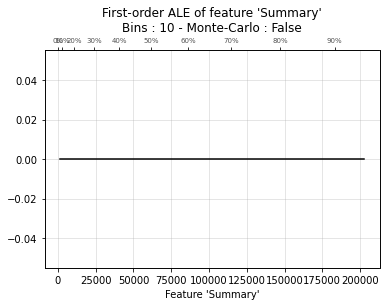

In [ ]:
ge.plot_ale('Summary', False)

In [ ]:
ge.plot_global_feature_weights()

Weight,Feature
0.4325 ± 0.7562,HelpfulnessDenominator
0.2175 ± 0.5786,Summary
0.1550 ± 0.3882,HelpfulnessNumerator
0.0914 ± 0.2829,Time
0.0349 ± 0.1819,UserId
0.0334 ± 0.1724,ProductId
0.0233 ± 0.1141,ProfileName
0.0116 ± 0.0902,Text
0.0005 ± 0.0074,Id


In [ ]:
ge.plot_global_feature_weights_group_by_target_labels()

##Local Interpretability

In [ ]:
class LocalExplainer:
  def __init__(self, data, model, preprocessing, preds):
    self.model = model
    self.data = data
    self.xpl = SmartExplainer()
    self.xpl.compile(
      x=data,
      model=model,
      preprocessing=preprocessing, # Optional: compile step can use inverse_transform method
      y_pred=preds
      )
    
  def plot_local_contribution(self,col):
    return self.xpl.plot.contribution_plot(col)
  
  def plot_filter_positive_or_negative(self, max_contrib, positiveOnly, index):
    self.xpl.filter(max_contrib=9,positive=positiveOnly)
    return self.xpl.plot.local_plot(index=index)

  def plot_local_feature_importance(self, index):
    return self.xpl.plot.local_plot(index=index)
  
  def compare_local_feature_plots(self, index1, index2):
    return self.xpl.plot.compare_plot(index=[self.data.index[index1], self.data.index[index2]])
  
  def save_explainer(self, max_contrib):
    return self.xpl.to_pandas(max_contrib = max_contrib)

  def plot(self, sample_data, clf):
    explainer = shap.TreeExplainer(clf, feature_perturbation='interventional', data=sample_data)
    shap_values = explainer.shap_values(sample_data)
    idx=0
    for which_class in range(0,5):
      print(classifier.classes_[which_class])
      display(shap.force_plot(explainer.expected_value[which_class], shap_values[which_class][idx], np.array(sample_data.iloc[idx, :]).reshape(1, 9), link='logit'))




In [ ]:
le = LocalExplainer(Xtest,classifier, encoder,y_pred)

Backend: Shap TreeExplainer


In [ ]:
shap.initjs()
le.plot(Xtrain[:1000], classifier)

1


2


3


4


5


In [ ]:
le.plot_local_feature_importance(420)

In [ ]:
class LocalTextExplainer:
  
  def __init__(self, data, y):
    ! pip install shap==0.39.0
    import shap
    import transformers
    self.data = data
    encoding = { i : i - 1 for i in y.unique().tolist()}
    self.y_encoded = y.replace(encoding)
  
  def preprocessText(self, col, max_features, max_length):
    self.trn, self.val ,self.preproc = text.texts_from_array(x_train=self.data[col].values,
                                     y_train = self.y_encoded.values, 
                                     class_names=self.y_encoded.unique().tolist(),
                                     preprocess_mode='bert',
                                     max_features=max_features,
                                     maxlen=max_length)
    self.col = col

  def trainModel(self, batch_size, max_learning_rate, epochs):
    self.model = text.text_classifier('bert',train_data=self.trn,preproc=self.preproc)
    self.learner = ktrain.get_learner(self.model,train_data=self.trn,batch_size=batch_size)
    self.learner.fit_onecycle(max_learning_rate,epochs)

  def explainText(self, index):
    self.predictor = ktrain.get_predictor(self.learner.model,preproc=self.preproc)
    return self.predictor.explain(self.data[self.col][index])
  
  def savePredictor(self, location):
    self.predictor.save(location)
  
  def loadPredictor(self, location):
    return ktrain.load_predictor(location)

  def polarity(self, col):
    model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

    # explain the model on two sample inputs
    explainer = shap.Explainer(model) 
    a= list(df[col])
    shap_values = explainer([a[0]])
    return shap.plots.text(shap_values[0, :, "POSITIVE"])




In [ ]:
lte = LocalTextExplainer(df, df['Score'])

In [ ]:
lte.polarity('Text')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,23756,B0013NUGDE,A2OH0EA9PEW4FN,bookgoddess88,2,3,1279411200,Only 2 points for Weight Watchers,I order these chips on a regular basis. I lik...,3
1,528127,B000JMDH40,A8GHHQVULZ9NF,Alessandra,1,1,1240012800,Delicious!!!,Baby love it!Taste sweet but there is no sugar...,5
2,491505,B0026LJRW8,A2S40W6PSX0CQI,Benjamin,1,1,1336348800,Baconlicious!,it's difficult to come up with 20 words for su...,5
3,98982,B001ED0H3C,A1XM4P40K1OPOM,"James M. Martin ""Mike""",0,0,1336694400,Will this probe work for the Oregon Scientific?,I beleive the probe I have for my Oregon Scien...,5
4,435471,B000HDI5O8,AGCA8UHBJZ1JI,Nancy J. Jacobsen,1,1,1272067200,organic pumpkin,"ALthough the pumkin was good, almost 90% of th...",3


In [ ]:
lte.preprocessText('Summary',32000,48)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
lte.trainModel(128,1e-2,1)

Is Multi-Label? False
maxlen is 48
done.


begin training using onecycle policy with max lr of 0.01...
2798/2798 [==============================] - 3995s 1s/step - loss: 1.2894 - accuracy: 0.6224


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lte.savePredictor('/content/drive/MyDrive/Datasets')

In [ ]:
lte.explainText(421)

In [ ]:
class TextualFeaturesExplainer:
  def __init__(self):
    self.stem_words= True
    self.pre= False
    self.class_to_visualize= False

  def text_to_wordlist(self, text, remove_stop_words=True):
      # Clean the text, with the option to remove stop_words and to stem words.
      # Clean the text
      text = re.sub(r"[^A-Za-z0-9]", " ", text)
  #     text = re.sub(r"</p>", "", text)
  #     text = re.sub(r"<p>", "", text)
      text = re.sub(r"what's", "", text)
      text = re.sub(r"\n", "", text)
      text = re.sub(r"What's", "", text)
      text = re.sub(r"\'s", " ", text)
      text = re.sub(r"\'ve", " have ", text)
      text = re.sub(r"can't", "cannot ", text)
      text = re.sub(r"n't", " not ", text)
      text = re.sub(r"I'm", "I am", text)
      text = re.sub(r" m ", " am ", text)
      text = re.sub(r"\'re", " are ", text)
      text = re.sub(r"\'d", " would ", text)
      text = re.sub(r"\'ll", " will ", text)
      text = re.sub(r" e g ", " eg ", text)
      text = re.sub(r" b g ", " bg ", text)
      text = re.sub(r"\0s", "0", text)
      text = re.sub(r"\s{2,}", " ", text)
      text = re.sub(r" J K ", " JK ", text)
      # Remove punctuation from text
      text = ''.join([c.lower() for c in text if c not in punctuation])
  #     print(text)
      # Optionally, remove stop words
      if remove_stop_words:
          text = text.split()
          text = [w for w in text if not w in stop_words]
          text = " ".join(text)

      # Optionally, shorten words to their stems
      if self.stem_words:
          text = text.split()
          stemmer = SnowballStemmer('english')
          stemmed_words = [stemmer.stem(word) for word in text]
          text = " ".join(stemmed_words)

      # Return a list of words
      return (text)

  def featureVecMethod(self, words, model, num_features):
      # Pre-initialising empty numpy array for speed
      featureVec = np.zeros(num_features,dtype="float32")
      nwords = 0
      
      #Converting Index2Word which is a list to a set for better speed in the execution.
      index2word_set = set(model.wv.index2word)
      
      for word in  words:
          if word in index2word_set:
              nwords = nwords + 1
              featureVec = np.add(featureVec,model.wv[word])
      
      # Dividing the result by number of words to get average
      featureVec = np.divide(featureVec, nwords)
      return featureVec

  # Function for calculating the average feature vector
  def getAvgFeatureVecs(self, reviews, model, num_features):
      counter = 0
      reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
      for review in tqdm(reviews):
              
          reviewFeatureVecs[counter] = self.featureVecMethod(review, model, num_features)
          counter = counter+1
          
      return reviewFeatureVecs

  def cleaned(self):
    self.sentences = []
    self.dictionary= []
    self.pre= True
    print("\nParsing sentences from training set")
    for i, review in enumerate(tqdm(self.demo[self.text_col])):
        tmp= self.text_to_wordlist(review)
        # demo['Text'].iloc[i]= tmp
        self.dictionary.append(tmp)
        self.sentences.append(tmp.split())
    

  def visualize_word(self, class_to_visualize):
    self.class_to_visualize= class_to_visualize
    if not self.pre:
      cleaned()
    skf= StratifiedKFold(n_splits=50, random_state=None, shuffle=False)
    for train_index, test_index in skf.split(self.demo.drop(self.target, axis=1), self.demo[self.target]):
            # print("TRAIN:", train_index, "TEST:", test_index)
            vis = self.demo.iloc[test_index]
            break

    vis[self.target]= vis[self.target].astype(str)
    # creating corpus      
    print("creating Corpus of words")  
    corpus = st.CorpusFromPandas(vis, category_col=self.target,                         
                              text_col=self.text_col,  nlp=nlp).build()

    sent = st.produce_scattertext_explorer(corpus,
          category=self.class_to_visualize,
          category_name=self.class_to_visualize,
  #         not_category_name='1',
          width_in_pixels=1000)
    
    #saving the html visualization
    print("HTML file has been generated for word visualization: ")
    open('./compact.html', 'w').write(sent)

  def visualize_text(self, df, text_col, target, classification, class_to_visualize):
    self.demo= df.copy()
    self.text_col= text_col
    self.target= target
    self.class_to_visualize= class_to_visualize
    if not self.pre:
      self.cleaned()
    if classification:
      self.visualize_word(class_to_visualize)
      # Creating the model and setting values for the various parameters
    num_features = 100  # Word vector dimensionality
    min_word_count = 40 # Minimum word count
    num_workers = 4     # Number of parallel threads
    context = 10        # Context window size
    downsampling = 1e-3 # (0.001) Downsample setting for frequent words

    # Initializing the train model

    print("Training model....")
    model = word2vec.Word2Vec(self.sentences,\
                              workers=num_workers,\
    #                           size=num_features,\
                              min_count=min_word_count,\
                              window=context,
                              sample=downsampling)

    # To make the model memory efficient
    model.init_sims(replace=True)

    # Saving the model for later use. Can be loaded using Word2Vec.load()
    model_name = "100features_40minwords_10context.model"
    model.save(model_name)
    model= word2vec.Word2Vec.load(model_name)
    print("\nVECTOR GENERATION FROM TEXT: ")
    trainDataVecs = self.getAvgFeatureVecs(self.sentences, model, num_features)
    hover_col= df.drop([text_col, target], axis=1).columns

    self.demo= pd.concat([df.drop(text_col, axis=1), pd.DataFrame(np.array(list(trainDataVecs)))], axis=1)
    self.demo= self.demo.dropna()

    skf= StratifiedKFold(n_splits=20, random_state=None, shuffle=False)
    for train_index, test_index in skf.split(self.demo.drop(target, axis=1), self.demo[target]):
            # print("TRAIN:", train_index, "TEST:", test_index)
            vis = self.demo.iloc[test_index]
            break

    print("VISUALIZING THE DATA ACROSS MULTIPLE SCORE VALUES : ")

    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(vis.drop(hover_col, axis=1))
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    vis['tsne-2d-one'] = tsne_results[:,0]
    vis['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    return px.scatter(
        x="tsne-2d-one", y="tsne-2d-two",
        color=target,
        hover_data= hover_col,
        data_frame=vis,
    )
    

In [ ]:
inst= TextualFeaturesExplainer()
inst.visualize_text(df, 
                    text_col='Text', 
                    target='Score', 
                    classification= True, 
                    class_to_visualize= '1')

  0%|          | 153/397917 [00:00<04:21, 1520.04it/s]


Parsing sentences from training set


100%|██████████| 397917/397917 [04:33<00:00, 1456.09it/s]


creating Corpus of words
HTML file has been generated for word visualization: 
Training model....


  0%|          | 167/397917 [00:00<03:59, 1662.25it/s]


VECTOR GENERATION FROM TEXT: 


100%|██████████| 397917/397917 [04:07<00:00, 1609.73it/s]


VISUALIZING THE DATA ACROSS MULTIPLE SCORE VALUES : 
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19895 samples in 0.298s...
[t-SNE] Computed neighbors for 19895 samples in 35.573s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19895
[t-SNE] Computed conditional probabilities for sample 2000 / 19895
[t-SNE] Computed conditional probabilities for sample 3000 / 19895
[t-SNE] Computed conditional probabilities for sample 4000 / 19895
[t-SNE] Computed conditional probabilities for sample 5000 / 19895
[t-SNE] Computed conditional probabilities for sample 6000 / 19895
[t-SNE] Computed conditional probabilities for sample 7000 / 19895
[t-SNE] Computed conditional probabilities for sample 8000 / 19895
[t-SNE] Computed conditional probabilities for sample 9000 / 19895
[t-SNE] Computed conditional probabilities for sample 10000 / 19895
[t-SNE] Computed conditional probabilities for sample 11000 / 19895
[t-SNE] Computed conditional probabilities for sample 12000 / 1

<Figure size 1152x720 with 0 Axes>